# Yolo v5
## Source 
* Yolo v5 orginal      : https://github.com/ultralytics/yolov5 
* Yolo v5 forked      : https://github.com/nowage/yolov5
* This Implementation : https://datacook.tistory.com/60





# Setting

## Google Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Set Variable

In [54]:

# Data file 
url = 'https://app.roboflow.com/ds/kkgiK2Xu4r?key=zbMbP1RFEa'
# Data file Path
dPath='/content/drive/MyDrive/yolov5_work/data/'  
!rm -rf {dPath}
# Working folder Path
wPath='/content/drive/MyDrive/yolov5_work'


In [55]:
!mkdir {wPath}
%cd {wPath}
!git clone https://github.com/nowage/yolov5.git

mkdir: cannot create directory ‘/content/drive/MyDrive/yolov5_work’: File exists
/content/drive/MyDrive/yolov5_work
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [56]:
wPath+="/yolov5"

## Library Install

In [57]:
!pip uninstall -y imgaug

In [58]:
%cd {wPath}
!pip install -r requirements.txt
!pip install -U PyYAML

/content/drive/MyDrive/yolov5_work/yolov5


## Library Loading

In [59]:
from os.path import join,isfile,isdir
import pandas as pd
import numpy as np


In [60]:
p="/content/" + "drive"
!ls {p}

MyDrive  Othercomputers


In [61]:
p=join("/content",'"drive"')
!ls {p}

MyDrive  Othercomputers


# Data Load

## Training File Load

In [62]:
# !rmdir {dPath}
# %cd {dPath}
# !pwd
# !curl -L "{url}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip    

In [63]:
# %cd /content
# !rm -rf {dPath}
if not isdir(dPath) :
  !mkdir {dPath}
  %cd {dPath}
  !pwd
  !curl -L "{url}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip    
else:
  print('기존 Data file 사용')
  %cd {dPath}
  !ls {dPath}
  

/content/drive/MyDrive/yolov5_work/data
/content/drive/MyDrive/yolov5_work/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1566      0 --:--:-- --:--:-- --:--:--  1566
100  252k  100  252k    0     0   371k      0 --:--:-- --:--:-- --:--:--  371k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/KakaoTalk_Photo_2020-12-21-20-36-58_jpeg.rf.765a08376260875f45278560dcd79437.jpg  
   creating: test/labels/
 extracting: test/labels/KakaoTalk_Photo_2020-12-21-20-36-58_jpeg.rf.765a08376260875f45278560dcd79437.txt  
   creating: train/
   creating: train/images/
 extracting: train/images/KakaoTalk_Photo_2020-12-21-20-35-47_jpeg.rf.de1f05e0599f9a90c499fced175628d2.jpg  
 extracting: train/images/KakaoTalk_Photo_2020-12-21-20-36-02_

In [64]:
%cd {wPath}

/content/drive/MyDrive/yolov5_work/yolov5


In [65]:
!cat /content/drive/MyDrive/yolov5_work/data/test/labels/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.5633f5fe7a9b926101b7fc16615dfb6a.txt

cat: /content/drive/MyDrive/yolov5_work/data/test/labels/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.5633f5fe7a9b926101b7fc16615dfb6a.txt: No such file or directory


In [66]:
import yaml

with open(join(dPath,'data.yaml'), 'r') as f:
  data = yaml.load(f, Loader=yaml.FullLoader)


data['train'] = dPath
data['test'] = dPath
data['val'] = dPath

with open(join(dPath,'data.yaml'), 'w') as f:
  yaml.dump(data, f)



In [67]:
data

{'names': ['pen'],
 'nc': 1,
 'test': '/content/drive/MyDrive/yolov5_work/data/',
 'train': '/content/drive/MyDrive/yolov5_work/data/',
 'val': '/content/drive/MyDrive/yolov5_work/data/'}

# Train

In [68]:
%cd {wPath}

!python train.py --help

/content/drive/MyDrive/yolov5_work/yolov5
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--evolve [EVOLVE]] [--bucket BUCKET]
                [--cache [CACHE]] [--image-weights] [--device DEVICE]
                [--multi-scale] [--single-cls] [--adam] [--sync-bn]
                [--workers WORKERS] [--project PROJECT] [--entity ENTITY]
                [--name NAME] [--exist-ok] [--quad] [--linear-lr]
                [--label-smoothing LABEL_SMOOTHING] [--upload_dataset]
                [--bbox_interval BBOX_INTERVAL] [--save_period SAVE_PERIOD]
                [--artifact_alias ARTIFACT_ALIAS] [--local_rank LOCAL_RANK]
                [--freeze FREEZE] [--patience PATIENCE]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial 

In [69]:
!ls {wPath}/runs/train #없는 것이 맞음.

mask_yolov5s_results  mask_yolov5s_results2


In [84]:
%cd {wPath}

!python train.py            \
--img 416                   \
--batch 16                  \
--epochs 100                 \
--data {dPath}/data.yaml    \
--cfg ./models/yolov5s.yaml \
--weights yolov5s.pt        \
--name mask_yolov5s_results

/content/drive/MyDrive/yolov5_work/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/yolov5_work/data//data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=mask_yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: up to date with https://github.com/nowage/yolov5 ✅
YOLOv5 🚀 v5.0-441-ge65109f torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, 

In [85]:
!nvidia-smi

Thu Dec  2 04:19:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    34W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## TensorBoard

In [86]:
# %load_ext tensorboard
# %tensorboard --logdir {wPath}/runs/


# Implementation

In [87]:
%cd {wPath}

from glob import glob

img_list = glob(join(dPath,'test/images/*.jpg'))

print(len(img_list))

/content/drive/MyDrive/yolov5_work/yolov5
1


## Test

In [88]:
!ls {join(wPath,'runs/train')}

mask_yolov5s_results   mask_yolov5s_results3
mask_yolov5s_results2  mask_yolov5s_results4


In [89]:
from IPython.display import Image
import os

val_img_path = img_list[0]

weights_path = join(wPath,'runs/train/mask_yolov5s_results/weights/best.pt')
!python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}"



detect: weights=['/content/drive/MyDrive/yolov5_work/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/yolov5_work/data/test/images/KakaoTalk_Photo_2020-12-21-20-36-58_jpeg.rf.765a08376260875f45278560dcd79437.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-441-ge65109f torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: igno

## Result Show

In [90]:
!ls {join(wPath,'runs/detect/')}

exp  exp2  exp3  exp4


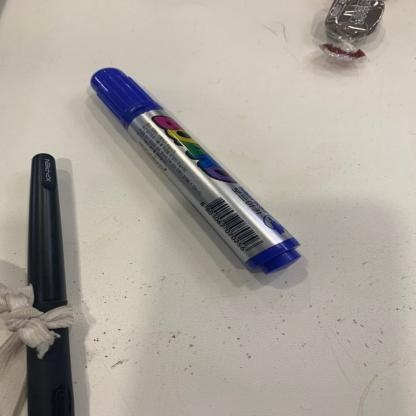

In [91]:
detect_img_path = join(wPath,'runs/detect/exp4')
Image(join(detect_img_path, os.path.basename(val_img_path)))